##  Top 50 Spotify Tracks of 2020

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotifytoptracks.csv") 

In [3]:
#view first five rows of dataset
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [4]:
"""
Removing "Unnamed: 0" column as it does not provide any meaningful information
"""
df = df.drop(['Unnamed: 0'], axis=1) 

## Data Cleaning
### Handling missing values

In [5]:
df.isnull().sum() # no missing/NaN values found

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [6]:
df.isnull().values.any() # just to be sure

False

### Removing duplicate samples and features

In [7]:
newdf = df.drop_duplicates(
  subset = ['artist', 'track_name'],
  keep = 'last').reset_index(drop = True)
   
if len(newdf) == len(df):
    print("No Duplicate songs found.")
else:
    print("Duplicate songs have been removed.")
    df = newdf

No Duplicate songs found.


### Detecting and treating the outliers

In [8]:
outliers = []

def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers 

In [9]:
loudness_outliers = detect_outliers_zscore(df["loudness"])
df[df["loudness"] == loudness_outliers[0]]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657,0.106,0.243,120.006,245426,Pop


In [10]:
duration_outliers = detect_outliers_zscore(df["duration_ms"])
df[df["duration_ms"] == duration_outliers[0]]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


In [11]:
tempo_outliers = detect_outliers_zscore(df["tempo"])
df[df["tempo"] == tempo_outliers[0]]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


In [12]:
acousticness_outliers = detect_outliers_zscore(df["acousticness"])
df[df["acousticness"] == acousticness_outliers[0]]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


## Exploratory data analysis

In [13]:
num_entries = len(df)
print(f'There are {num_entries} entries in the dataset.')

There are 50 entries in the dataset.


In [14]:
num_columns = df.shape[1]
print(f'The dataset has {num_columns} features.')

The dataset has 16 features.


### Numeric Features
A numerical variable is a variable where the measurement or number has a numerical meaning.

In [15]:
numeric = df.select_dtypes(include='number')
print(f"There are {numeric.shape[1]} number of features that are numeric.\n"
       "However, the feature 'key' (the primary identifier of songs) should be considered as categoric value.")

There are 11 number of features that are numeric.
However, the feature 'key' (the primary identifier of songs) should be considered as categoric value.


In [16]:
print(f"Numeric features:\n{list(numeric.columns)}.")

Numeric features:
['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'].


### Categoric Features
Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. 

In [17]:
""" 
The categoric features are all other remaining features from the dataset
"""
categoric = [col for col in df.columns if col not in list(numeric.columns) or col == "key"]
print(f"Categoric features:\n{categoric}.")

Categoric features:
['artist', 'album', 'track_name', 'track_id', 'key', 'genre'].


### Artists occurences
Are there any artists that have more than 1 popular track? If yes, which and how many?

In [18]:
artist_occur = df.groupby(['artist']).size() 
artist_occur

artist
24kGoldn           1
Ariana Grande      1
Arizona Zervas     1
BENEE              1
BTS                1
Bad Bunny          1
Billie Eilish      3
Black Eyed Peas    1
Cardi B            1
DaBaby             1
Doja Cat           1
Drake              1
Dua Lipa           3
Eminem             1
Future             1
Harry Styles       2
JP Saxe            1
Jawsh 685          1
Juice WRLD         1
Justin Bieber      2
KAROL G            1
Lady Gaga          1
Lewis Capaldi      2
Lil Mosey          1
Maluma             1
Maroon 5           1
Post Malone        2
Powfu              1
Regard             1
Roddy Ricch        1
SAINt JHN          1
Shawn Mendes       1
Surf Mesa          1
Surfaces           1
THE SCOTTS         1
The Weeknd         1
Tones And I        1
Topic              1
Travis Scott       3
Trevor Daniel      1
dtype: int64

In [19]:
most_occur_artists = { k: v for k, v in artist_occur.items() if v > 1 }
print(f'There are {len(most_occur_artists)} artists that have more than 1 popular songs.')

There are 7 artists that have more than 1 popular songs.


### Most popular artists

In [20]:
max_occur =  max(most_occur_artists.values())
most_popular_artists = [ a for a in most_occur_artists if most_occur_artists[a] == max_occur ]
most_popular_artists

['Billie Eilish', 'Dua Lipa', 'Travis Scott']

In [21]:
print(f'There are {len(most_popular_artists)} most popular artists and each occurred {max_occur} times in the dataset')

There are 3 most popular artists and each occurred 3 times in the dataset


##### How many artists in total have their songs in the top 50?
The above variable "artist_occur" is a dictionary with all artists

In [22]:
print(f'There are {len(artist_occur)} artists in total in the top 50 Spotify dataset.')

There are 40 artists in total in the top 50 Spotify dataset.


### Most popular albums
##### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [23]:
albums_occur = df.groupby(['album']).size() 
most_occur_albums = { k: v for k, v in albums_occur.items() if v > 1 }
print(f'There are {len(most_occur_albums)} albums that have more than 1 popular songs in the Top 50 List.')

There are 4 albums that have more than 1 popular songs in the Top 50 List.


In [24]:
"""
Printing most popular albums
"""
for w in sorted(most_occur_albums, key=most_occur_albums.get, reverse=True):
    print(f'{w} occurred {most_occur_albums[w]} times.')

Future Nostalgia occurred 3 times.
Changes occurred 2 times.
Fine Line occurred 2 times.
Hollywood's Bleeding occurred 2 times.


### Analysing Tracks
#### Tracks have a danceability score above 0.7

In [25]:
df[df['danceability'] > 0.7][['artist', 'track_name', 'danceability']]

,artist,track_name,danceability
1,Tones And I,Dance Monkey,0.825
2,Roddy Ricch,The Box,0.896
3,SAINt JHN,Roses - Imanbek Remix,0.785
4,Dua Lipa,Don't Start Now,0.793
5,DaBaby,ROCKSTAR (feat. Roddy Ricch),0.746
7,Powfu,death bed (coffee for your head),0.726
8,Trevor Daniel,Falling,0.784
10,KAROL G,Tusa,0.803
13,Lil Mosey,Blueberry Faygo,0.774
14,Justin Bieber,Intentions (feat. Quavo),0.806


In [26]:
print(f"There are {len(df[df['danceability'] > 0.7][['artist', 'track_name', 'danceability']])} songs which dancebility score is more than 0.7")
print(f"There are {len(df[df['danceability'] <= 0.7][['artist', 'track_name', 'danceability']])} songs which dancebility score is less or equal than 0.7")

There are 32 songs which dancebility score is more than 0.7
There are 18 songs which dancebility score is less or equal than 0.7


#### Tracks that have a danceability score below 0.4

In [27]:
df[df['danceability'] < 0.4][['artist', 'track_name', 'danceability']]

,artist,track_name,danceability
44,Billie Eilish,lovely (with Khalid),0.351


In [28]:
print(f"There are {len(df[df['danceability'] < 0.4][['artist', 'track_name', 'danceability']])} songs  which dancebility score is less than 0.4")
print(f"There are {len(df[df['danceability'] >= 0.7][['artist', 'track_name', 'danceability']])} songs which dancebility score is more or equal than 0.4")

There are 1 songs which dancebility score is less than 0.4
There are 33 songs which dancebility score is more or equal than 0.4


#### Tracks that have their loudness above -5

In [29]:
df[df['loudness'] > -5][['artist', 'track_name', 'danceability']]

,artist,track_name,danceability
4,Dua Lipa,Don't Start Now,0.793
6,Harry Styles,Watermelon Sugar,0.548
10,KAROL G,Tusa,0.803
12,Post Malone,Circles,0.695
16,Lewis Capaldi,Before You Go,0.459
17,Doja Cat,Say So,0.787
21,Harry Styles,Adore You,0.676
23,24kGoldn,Mood (feat. iann dior),0.700
31,Dua Lipa,Break My Heart,0.730
32,BTS,Dynamite,0.746


In [30]:
print(f"There are {len(df[df['loudness'] > -5][['artist', 'track_name', 'danceability']])} songs which loudness score is more than -5")
print(f"There are {len(df[df['loudness'] <= -5][['artist', 'track_name', 'danceability']])} songs which loudness score is less or equal than -5")

There are 19 songs which loudness score is more than -5
There are 31 songs which loudness score is less or equal than -5


#### Tracks that have their loudness below -8

In [31]:
df[df['loudness'] < -8][['artist', 'track_name', 'danceability']]

,artist,track_name,danceability
7,Powfu,death bed (coffee for your head),0.726
8,Trevor Daniel,Falling,0.784
15,Drake,Toosie Slide,0.830
20,Jawsh 685,Savage Love (Laxed - Siren Beat),0.767
24,Billie Eilish,everything i wanted,0.704
26,Billie Eilish,bad guy,0.701
36,Travis Scott,HIGHEST IN THE ROOM,0.598
44,Billie Eilish,lovely (with Khalid),0.351
47,JP Saxe,If the World Was Ending - feat. Julia Michaels,0.464


In [32]:
print(f"There are {len(df[df['loudness'] > -8][['artist', 'track_name', 'danceability']])} songs which loudness score is more than -8")
print(f"There are {len(df[df['loudness'] <= -8][['artist', 'track_name', 'danceability']])} songs which loudness score is less or equal than -8")

There are 41 songs which loudness score is more than -8
There are 9 songs which loudness score is less or equal than -8


#### The Longest Track

In [33]:
df[df['duration_ms'] == max(df['duration_ms'])]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
49,Travis Scott,ASTROWORLD,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,0.73,0.834,8,-3.714,0.00513,0.222,0.0,0.124,0.446,155.008,312820,Hip-Hop/Rap


#### The Shortest Track

In [34]:
df[df['duration_ms'] == min(df['duration_ms'])]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
23,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.722,0.7,7,-3.558,0.221,0.0369,0.0,0.272,0.756,90.989,140526,Pop rap


### Most Popular Genre

In [35]:
genres_occur = df.groupby(['genre']).size() 
genres_occur 

genre
 Electro-pop                           2
Alternative/Indie                      4
Alternative/reggaeton/experimental     1
Chamber pop                            1
Dance-pop/Disco                        1
Dance/Electronic                       5
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Rap                           13
Hip-Hop/Trap                           1
Nu-disco                               1
Pop                                   14
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
R&B/Soul                               2
dtype: int64

#### Which genre is the most popular?

In [36]:
most_popular_genre = max(genres_occur.items(), key = lambda k : k[1])
print(f'Most popular genre was {most_popular_genre[0]} and it occurred {most_popular_genre[1]} times.')

Most popular genre was Pop and it occurred 14 times.


#### Which genres have just one song on the top 50?

In [37]:
genres_occur_one = [ g for g in genres_occur.keys() if genres_occur[g] == 1 ]
genres_occur_one

['Alternative/reggaeton/experimental',
 'Chamber pop',
 'Dance-pop/Disco',
 'Disco-pop',
 'Dreampop/Hip-Hop/R&B',
 'Hip-Hop/Trap',
 'Nu-disco',
 'Pop rap',
 'Pop/Soft Rock',
 'R&B/Hip-Hop alternative']

#### How many genres in total are represented in the top 50?

In [38]:
print(f'{len(genres_occur)} genres are represented in the dataset.')

16 genres are represented in the dataset.


### Features Correlation

Useful addition to the feature analysis would be make genre as a numeric feature. Therefore, each genre will have number assigned to it.

In [39]:
df["genre_numeric"] = df["genre"].astype('category')
df["genre_numeric"] = df["genre_numeric"].cat.codes 
df

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,genre_numeric
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul,15
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie,1
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap,8
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic,5
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco,10
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap,8
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop,11
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap,8
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative,14
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie,1


In [40]:
df.corr()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre_numeric
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971,0.058974
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763,0.006863
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345,0.161231
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130,0.025974
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988,-0.177654
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976,-0.084568
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709,0.053529
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188,0.075455
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794,-0.037602
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328,0.107713


<AxesSubplot:>

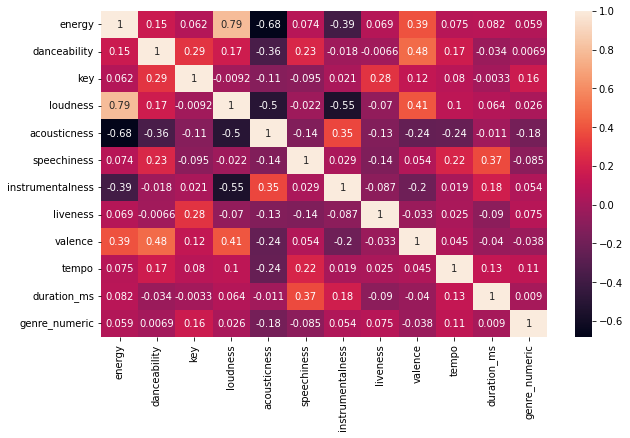

In [41]:
figure, ax = plt.subplots(figsize=(10, 6)) 
sns.heatmap(df.corr(), ax=ax, annot=True) 

In [42]:
import itertools 
corr_df = pd.DataFrame([[(i,j), df.corr().loc[i,j]]
                   for i,j in list(itertools.combinations(df.corr(), 2))],columns=['feature_pairs','corr'])    
corr_df = corr_df.sort_values(by='corr',ascending=False)
corr_df

,feature_pairs,corr
2,"(energy, loudness)",0.791640
17,"(danceability, valence)",0.479953
34,"(loudness, valence)",0.406772
7,"(energy, valence)",0.393453
49,"(speechiness, duration_ms)",0.366976
...,...,...
13,"(danceability, acousticness)",-0.359135
5,"(energy, instrumentalness)",-0.385515
30,"(loudness, acousticness)",-0.498695
32,"(loudness, instrumentalness)",-0.553735


#### Which features are strongly positively correlated?

In [43]:
positive_correlated = corr_df.iloc[:5]

print(f"Strongest positively correlation features.")
display(positive_correlated)

Strongest positively correlation features.


,feature_pairs,corr
2,"(energy, loudness)",0.791640
17,"(danceability, valence)",0.479953
34,"(loudness, valence)",0.406772
7,"(energy, valence)",0.393453
49,"(speechiness, duration_ms)",0.366976


#### Which features are strongly negatively correlated?

In [44]:
neg_correlated = corr_df.iloc[-5:]

print(f"Strongest negatively correlation features.")
display(neg_correlated)

Strongest negatively correlation features.


,feature_pairs,corr
13,"(danceability, acousticness)",-0.359135
5,"(energy, instrumentalness)",-0.385515
30,"(loudness, acousticness)",-0.498695
32,"(loudness, instrumentalness)",-0.553735
3,"(energy, acousticness)",-0.682479


#### Which features are not correlated?

In [45]:
print(f"Features that have almost no correlation.")
corr_df[(corr_df['corr'] < 0.1) & (corr_df['corr'] > -0.1)]

Features that have almost no correlation.


,feature_pairs,corr
9,"(energy, duration_ms)",0.081971
27,"(key, tempo)",0.080475
59,"(liveness, genre_numeric)",0.075455
8,"(energy, tempo)",0.075191
4,"(energy, speechiness)",0.074267
6,"(energy, liveness)",0.069487
36,"(loudness, duration_ms)",0.064130
1,"(energy, key)",0.062428
10,"(energy, genre_numeric)",0.058974
47,"(speechiness, valence)",0.053867


### Danceability score compared between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

In [46]:
def compare_plot_four_genres(gen1, gen2, gen3, gen4, compare_value):
    genres = [gen1, gen2, gen3, gen4]
    gen1_value = list(df[df['genre'] == gen1][compare_value])
    gen2_value = list(df[df['genre'] == gen2][compare_value])
    gen3_value = list(df[df['genre'] == gen3][compare_value])
    gen4_value = list(df[df['genre'] == gen4][compare_value])
    
    avg_gen1_value = np.mean(gen1_value)
    avg_gen2_value = np.mean(gen2_value)
    avg_gen3_value = np.mean(gen3_value)
    avg_gen4_value = np.mean(gen4_value)
    
    print(avg_gen1_value)
    
    averages = [avg_gen1_value, avg_gen2_value,
                avg_gen3_value, avg_gen4_value]
    
    averages.sort()
    
    plt.xticks(rotation=90) 
    plt.title(f'Comparing {compare_value} between genres.') 
    plt.bar(genres, averages, color=['#3f5445', '#3f544f', '#3f4c54', '#403f54'])

0.6775714285714286


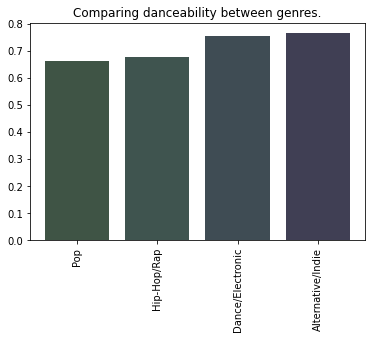

In [47]:
compare_plot_four_genres('Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie', 'danceability')

### Loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

-6.460357142857143


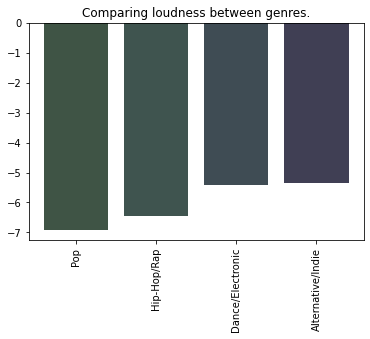

In [48]:
compare_plot_four_genres('Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie', 'loudness')

### Acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

0.3238428571428571


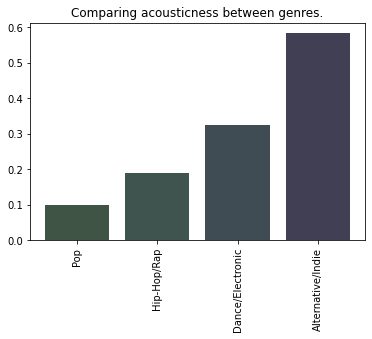

In [49]:
compare_plot_four_genres('Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie', 'acousticness')

## Future Improvements

* Compare Duration between songs to see whether it affects its popularity
* Compare more genres with different features
* Analyse the songs by taking into account the strong positively/negatively correlated features
* More visual representations of the data